# Import library

In [1]:
import numpy as np
import pandas as pd
import pyapep_storage4_z_1p5 as pa
import matplotlib.pyplot as plt
import pyiast

# Isotherm Data

## Key Information

In [2]:
par_ch4 = [4.71039664e+02, 3.94049578e-03] # Based on mol/kg vs bar
par_n2 = [1.64797284e+02, 1.06938754e-02] # Based on mol/kg vs bar

dH_list = [7.21948242, 5.57875871] ## kJ
T_ref_list = [220.0,180.0]  ## K

rho_solid = 164.114128155068 ## kg/m^3

def Lang(p_in,par):
    qtmp = par[0] * par[1]*p_in/(1+par[1]*p_in)
    return qtmp

def Quad(p_in,par):
    qtmp = par[0]*(par[1]*p_in+2*par[2]*p_in**2)/(1+par[1]*p_in + par[2]*p_in**2)
    return qtmp

def DSLa(p_in,par):
    qtmp1 = par[0]*par[2]*p_in/(1+par[2]*p_in)
    qtmp2 = par[1]*par[3]*p_in/(1+par[3]*p_in)
    qtmp_return = qtmp1 + qtmp2
    return qtmp_return

Text(0.5, 1.0, 'N2 dummy')

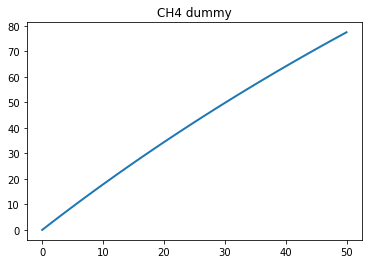

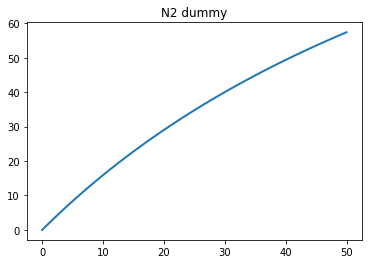

In [3]:
## CH4 Case ##
p_test = np.linspace(0,50, 51)
qch4_test = Lang(p_test,par_ch4)
di_ch4 = {'p':p_test,'q':qch4_test}
df_ch4 = pd.DataFrame(di_ch4)

plt.figure()
plt.plot(p_test,qch4_test,linewidth = 2)
plt.title('CH4 dummy')


## N2 Case ##
p_test = np.linspace(0,50, 51)
qn2_test = Lang(p_test,par_n2)
di_n2 = {'p':p_test,'q':qn2_test}
df_n2 = pd.DataFrame(di_n2)

plt.figure()
plt.plot(p_test,qn2_test,linewidth = 2)
plt.title('N2 dummy')

## Fitting with pyiast

In [4]:
iso0 = pyiast.ModelIsotherm(df_ch4,
                            loading_key='q',pressure_key = 'p',
                            model= 'Langmuir', 
                            param_guess = {
                                'M': par_ch4[0],
                                'K':par_ch4[1],
                                })
print(iso0.params)

iso1 = pyiast.ModelIsotherm(df_n2,
                            loading_key='q',pressure_key = 'p',
                            model= 'Langmuir', 
                            param_guess = {'M': par_n2[0],
                                           'K': par_n2[1],
                                           })
print(iso1.params)
iso_pyiast = [iso0, iso1]

{'M': 471.039664, 'K': 0.00394049578}
{'M': 164.797284, 'K': 0.0106938754}


# Test Storage Tank Model

In [5]:
### Conditions ###

# %% Feed conditions
# Inlet conditions ?
feed_composition = [0.995,0.005]
T_inlet = 300 # K

# %% Heat capacity info
# Heat related properties (methane; nitrogen) + (zeolite)
Cp_g = np.array([40.63,29.22])  # Gas heat capacity: J/mol/K
Cp_s = 850                      # Solid heat capacity: J/kg/K
#Cp_s = 948                      # Solid heat capacity: J/kg/K

x_gas = [0.995,0.005]
T_current = [298]
#T_current = [250]
P_init = 1
P_norm = np.exp(np.array(dH_list)*1000/8.3145*(1/np.array(T_current) - 1/np.array(T_ref_list)))*x_gas*P_init
q_init_eq = pyiast.iast(P_norm,[iso0,iso1],)
print('[q_inti_1, q_init_2] = ')
print(q_init_eq)
#q_solid = [0.0,0.0]
q_solid = list(q_init_eq)

initial_variables = x_gas + q_solid + T_current


[q_inti_1, q_init_2] = 
[0.65640206 0.0020084 ]


In [6]:
Result_test = pa.storage_tank(feed_composition,iso_pyiast,dH_list,T_ref_list,
                              initial_variables,P_in=3, T_in = T_inlet)
Perf_test = pa.Massbal_interation(Result_test.x[0:2], Result_test.x[2],
                                  feed_composition,iso_pyiast,dH_list,T_ref_list,
                                  initial_variables,P_in=3, T_in = T_inlet)
print(Perf_test)

(6568.596651592309, array([1.15588205, 0.00572101]), 0, array([ True,  True]))


# For different pressure and temperature

## Import Feed Conditions

[314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314.]
[  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.  33.  36.  39.  42.
  45.  48.  51.  54.  57.  60.  63.  66.  69.  72.  75.  78.  81.  84.
  87.  90.  93.  96.  99. 102. 105. 108. 111. 114. 117. 120. 123. 126.
 129. 132. 135. 138. 141. 144. 147. 150. 153. 156. 159. 162. 165. 168.
 171. 174. 177. 180. 183. 186. 189. 192. 195. 198. 201. 204. 207. 210.
 213. 216. 219. 222. 225. 228. 231. 234. 237. 240. 243. 246. 249. 252.
 255. 258. 261. 264. 267. 270. 273. 276. 279. 282. 285. 288. 291.

Text(0.5, 1.0, 'Feed Conditions After Compressor')

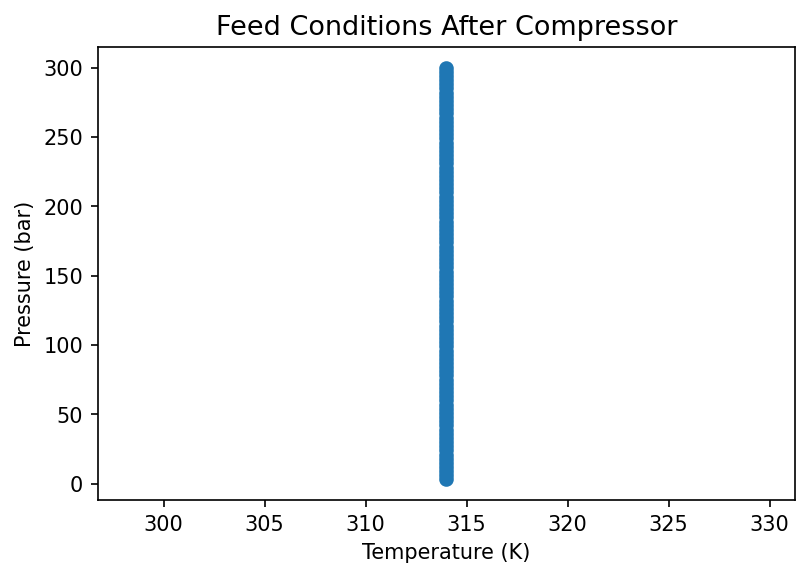

In [7]:
Pfeed_arr = np.linspace(3,300, 99+1)
Tfeed_arr = 314*np.ones(len(Pfeed_arr))
print(Tfeed_arr)
print(Pfeed_arr)

## Graph ##
plt.figure(dpi =150)
plt.plot(Tfeed_arr,Pfeed_arr, 'o')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (bar)')
plt.title('Feed Conditions After Compressor',fontsize = 13)

In [8]:
del_M_list = []
T_fin_list = []
L = 5
A = 3.1416
epsi = 0.4
Mmolar = np.array([0.016, 0.028])       # kg/mol
M_av = np.sum(np.array(x_gas)*Mmolar)   # kg/mol
Design_spec = {'A': A, 'L':L,'rho_s':rho_solid, 'epsi':0.4}
Mw_av = np.sum(
    np.array(feed_composition)*np.array([0.016, 0.028])) # kg/mol [CH4, N2]
M_ad = (rho_solid*L*A*(1-epsi))

ind1_tmp =37
ind2_tmp =-1
PP_tmp1 = Pfeed_arr[ind1_tmp]
TT_tmp1 = Tfeed_arr[ind1_tmp]
PP_tmp2 = Pfeed_arr[ind2_tmp]
TT_tmp2 = Tfeed_arr[ind2_tmp]
print(PP_tmp1, 'bar &', TT_tmp1, 'K')
print(PP_tmp2, 'bar &', TT_tmp2, 'K')
print()
re_tmp1 = pa.storage_tank(feed_composition,iso_pyiast, dH_list, T_ref_list,
                          initial_variables,
                          P_in = PP_tmp1, T_in=TT_tmp1,
                          Design=Design_spec)  
    
Perf_tmp1 = pa.Massbal_interation(re_tmp1.x[0:2], re_tmp1.x[2],
                                  feed_composition,iso_pyiast,
                                  dH_list,T_ref_list,
                                  initial_variables, P_in = PP_tmp1, T_in = TT_tmp1,
                                  Design=Design_spec)
# @ 100 bar : kg CH4 / kg MOF
mol_tmp1 = Perf_tmp1[0]
kg_tmp1 = Mw_av*mol_tmp1
kgkg_tmp1 = kg_tmp1/M_ad

T_tmp1 = re_tmp1.x[2]


re_tmp2 = pa.storage_tank(feed_composition,iso_pyiast, dH_list, T_ref_list,
                          initial_variables,
                          P_in = PP_tmp2, T_in=TT_tmp2,
                          Design=Design_spec)  
Perf_tmp2 = pa.Massbal_interation(re_tmp2.x[0:2], re_tmp2.x[2],
                                  feed_composition,iso_pyiast,
                                  dH_list,T_ref_list,
                                  initial_variables, P_in = PP_tmp2, T_in = TT_tmp2,
                                  Design=Design_spec)
# @ 300 bar : kg CH4 / kg MOF
mol_tmp2 = Perf_tmp2[0]
kg_tmp2 = Mw_av*mol_tmp2
kgkg_tmp2 = kg_tmp2/M_ad

T_tmp2 = re_tmp2.x[2]
print()
print('||  Storage RESULT : @ 100bar & @ 300bar ||')
print()

#print('{0:8f}'.format(kgkg_tmp1), ' kg NG/kg MOF')
#print('{0:8f}'.format(kgkg_tmp2), ' kg NG/kg MOF')
print('{0:8f}'.format(kgkg_tmp1))
print('{0:8f}'.format(kgkg_tmp2))
print()
print('|| Delta T RESULT: @ 100bar & @ 300bar ||')
print()
print('{0:8f}'.format(T_tmp1))
print('{0:8f}'.format(T_tmp2))

114.0 bar & 314.0 K
300.0 bar & 314.0 K


||  Storage RESULT : @ 100bar & @ 300bar ||

0.546625
1.202443

|| Delta T RESULT: @ 100bar & @ 300bar ||

93.516890
110.169397


## Run Storage Model

In [9]:
del_M_list = []
T_fin_list = []
L = 5
A = 3.1416
epsi = 0.4
Mmolar = np.array([0.016, 0.028])       # kg/mol
M_av = np.sum(np.array(x_gas)*Mmolar)   # kg/mol
Design_spec = {'A': A, 'L':L,'rho_s':rho_solid, 'epsi':0.4}
for T_ff, P_ff in zip(Tfeed_arr, Pfeed_arr):
    Result_tmp = pa.storage_tank(feed_composition,iso_pyiast, dH_list,T_ref_list,
                                initial_variables, 
                                P_in = P_ff, T_in = T_ff,
                                Design=Design_spec)
    Perf_tmp = pa.Massbal_interation(Result_tmp.x[0:2], Result_tmp.x[2],
                                     feed_composition,iso_pyiast,
                                     dH_list,T_ref_list,
                                     initial_variables, P_in = P_ff, T_in = T_ff,
                                     Design=Design_spec)
    del_M_list.append(Perf_tmp[0])
    T_fin_list.append(Result_tmp.x[2])

C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!
SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!


KeyboardInterrupt: 

## Graph (Storage)

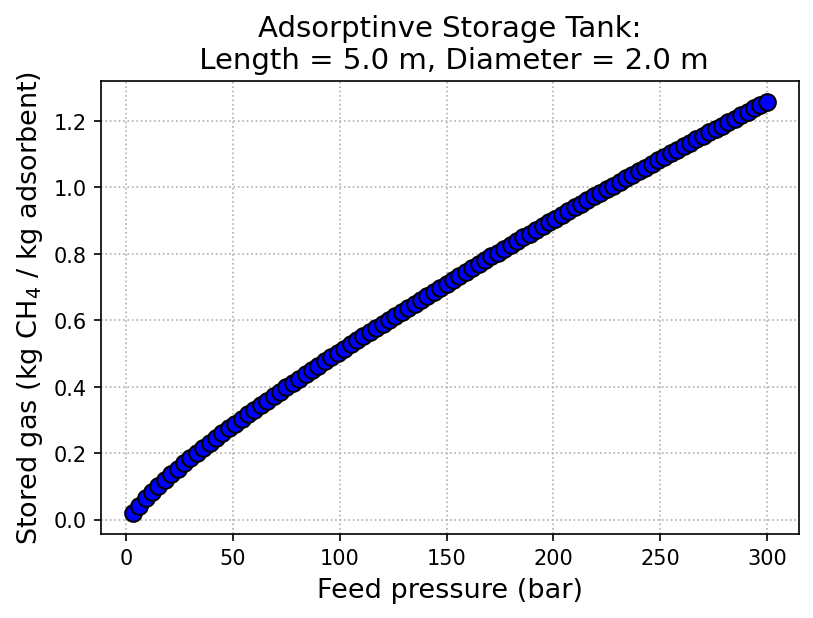

In [10]:
Mw_av = np.sum(
    np.array(feed_composition)*np.array([0.016, 0.028])) # kg/mol [CH4, N2]
del_M_kg = Mw_av*np.array(del_M_list)

plt.figure(dpi = 150)
plt.plot(Pfeed_arr, del_M_kg / (rho_solid*L*A*(1-epsi)),
         'o', color = 'k',markersize = 8, mfc = 'b')
plt.xlabel('Feed pressure (bar)', fontsize = 13)
plt.ylabel('Stored gas (kg CH$_{4}$ / kg adsorbent)', fontsize = 13)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m'.format(Leng,Diam), fontsize = 14)

plt.grid(linestyle = ':')

## Graph (Temperature)

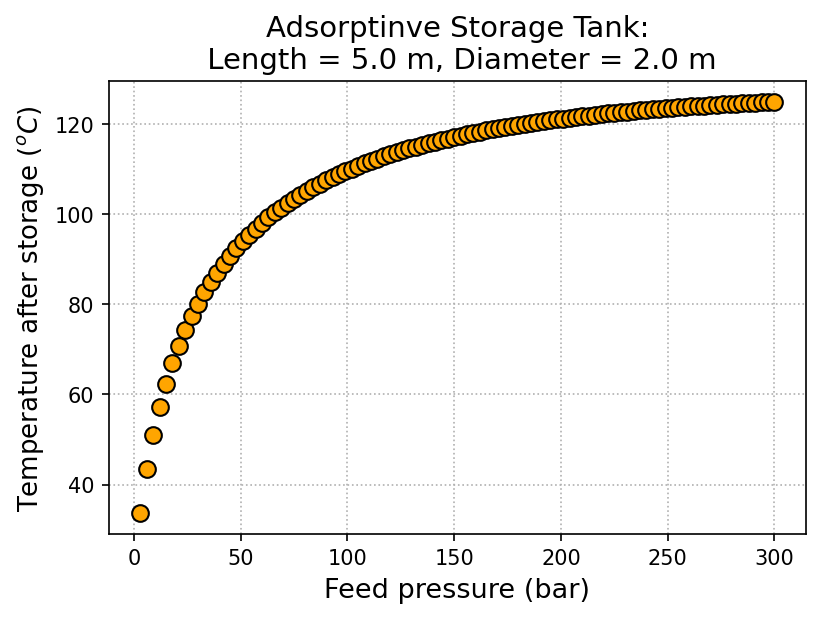

In [11]:
plt.figure(dpi = 150)
plt.plot(Pfeed_arr, np.array(T_fin_list) + T_current[0] - 273.15,
         'o', color = 'k',markersize = 8,mfc = 'orange')

plt.xlabel('Feed pressure (bar)', fontsize = 13)
plt.ylabel('Temperature after storage ($^{o}C$)', fontsize = 12.5)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m'.format(Leng,Diam), fontsize = 14)

plt.grid(linestyle = ':')

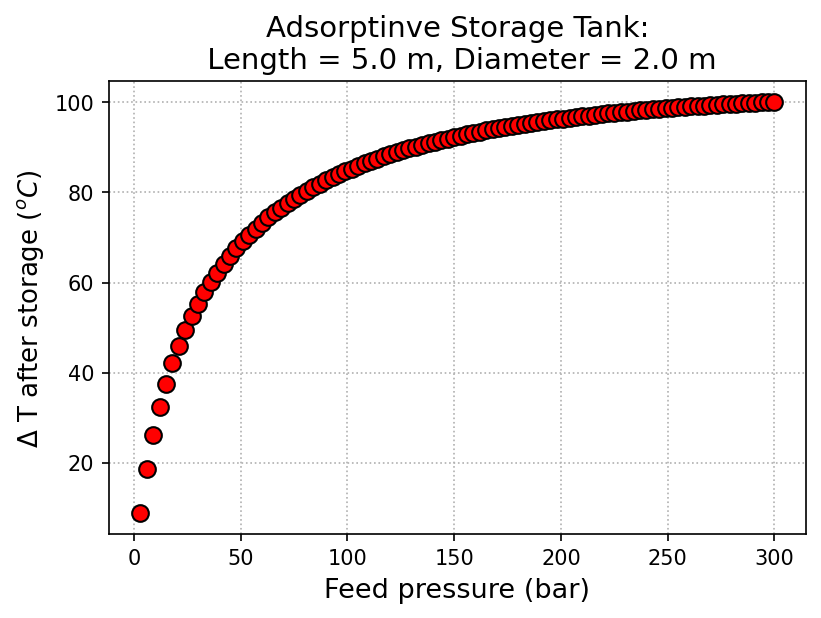

In [12]:
plt.figure(dpi = 150)
plt.plot(Pfeed_arr, T_fin_list, 
        'o', color = 'k',markersize = 8,mfc = 'r')

plt.xlabel('Feed pressure (bar)', fontsize = 13)
plt.ylabel('$\Delta$ T after storage ($^{o}C$)', fontsize = 12.5)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m'.format(Leng,Diam), fontsize = 14)

#plt.ylim([0, 68])
plt.grid(linestyle = ':')

# Surrogate Model

In [13]:
import scipy.optimize as optim

## Storage

In [30]:
def fn_guess(par,P):
    #T_return = par[0]*(par[1]*P)/(1+ par[1]*P) + par[2]*(par[3]*P)/(1+ par[3]*P)
    #del_m_return = par[0]*(par[1]*P**par[2])/(1+ par[1]*P**par[2])
    #del_m_return = par[0]*(par[1]*(P))/(1+ par[1]*(P))
    del_m_return = par[0]*(par[1]*(P-P_init)**par[2])/(1+ par[1]*(P-P_init)**par[2])
    return del_m_return 

def err_storage(par):
    #del_m_tmp = par[0]*par[1]*Pfeed_arr/(1+ par[1]*Pfeed_arr)
    del_m_tmp = fn_guess(par,Pfeed_arr[:])
    err = del_m_tmp - del_M_kg[:] / (rho_solid*L*A*(1-epsi))
    err_sq_sum = np.sum(err**2)
    return err_sq_sum
#es_opt = optim.shgo(err_storage, bounds=[[100,1000],[0,50]])
res_opt = optim.minimize(err_storage, x0 = [1, 0.005,0.8],
                        method = 'Nelder-mead')
print(res_opt)
res_opt_M = res_opt
psol = res_opt.x
P_ran = np.linspace(1,Pfeed_arr[-1],201)
del_M_pred = fn_guess(psol, P_ran)

 final_simplex: (array([[1.54028371e+01, 6.38285489e-04, 8.64567755e-01],
       [1.52572320e+01, 6.44742835e-04, 8.64638597e-01],
       [1.52389634e+01, 6.44274410e-04, 8.65004423e-01],
       [1.52977735e+01, 6.43306588e-04, 8.64476918e-01]]), array([0.00078915, 0.00079352, 0.00079618, 0.00079866]))
           fun: 0.0007891503497121498
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 600
           nit: 347
        status: 1
       success: False
             x: array([1.54028371e+01, 6.38285489e-04, 8.64567755e-01])


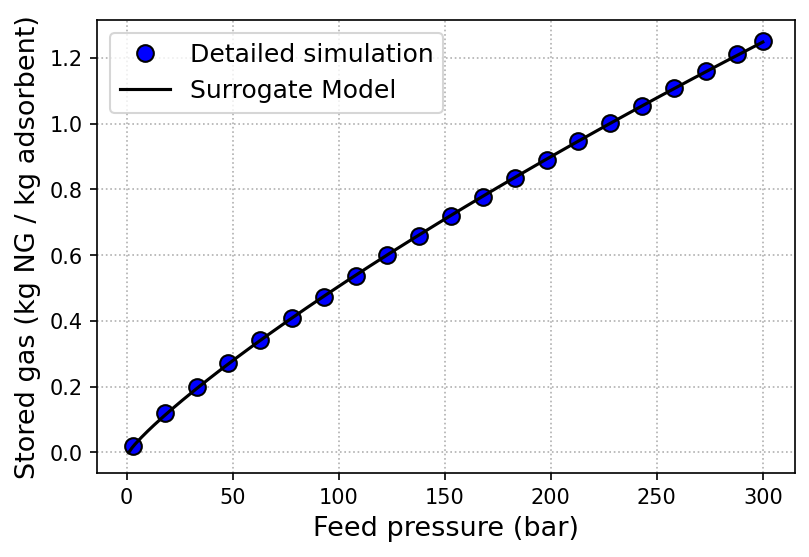

In [31]:
Mw_av = np.sum(
    np.array(feed_composition)*np.array([0.016, 0.014])) # kg/mol [CH4, N2]
del_M_kg = Mw_av*np.array(del_M_list)

plt.figure(dpi = 150)
Pfeed_arr_new = np.concatenate([Pfeed_arr[::5], [Pfeed_arr[-1]]])
del_M_kg_ov_M_ad = np.concatenate([del_M_kg[::5]/ (rho_solid*L*A*(1-epsi)),[del_M_kg[-1]/ (rho_solid*L*A*(1-epsi))]] )
plt.plot(Pfeed_arr_new, del_M_kg_ov_M_ad,
         'o', color = 'k',markersize = 8,
         mfc = 'b',label = 'Detailed simulation')

#plt.plot(Pfeed_arr[::5], del_M_kg[::5]/ (rho_solid*L*A*(1-epsi)),
#         'o', color = 'k',markersize = 8, mfc = 'b',
#        label = 'Detailed simulation')
plt.plot(P_ran,del_M_pred,'k',label = 'Surrogate Model')

plt.xlabel('Feed pressure (bar)', fontsize = 13)
#plt.ylabel('Stored gas (kg)', fontsize = 13)
plt.ylabel('Stored gas (kg NG / kg adsorbent)', fontsize = 13)

plt.legend(fontsize = 12)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
#plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m \n'.format(Leng,Diam), fontsize = 14)

plt.grid(linestyle = ':')

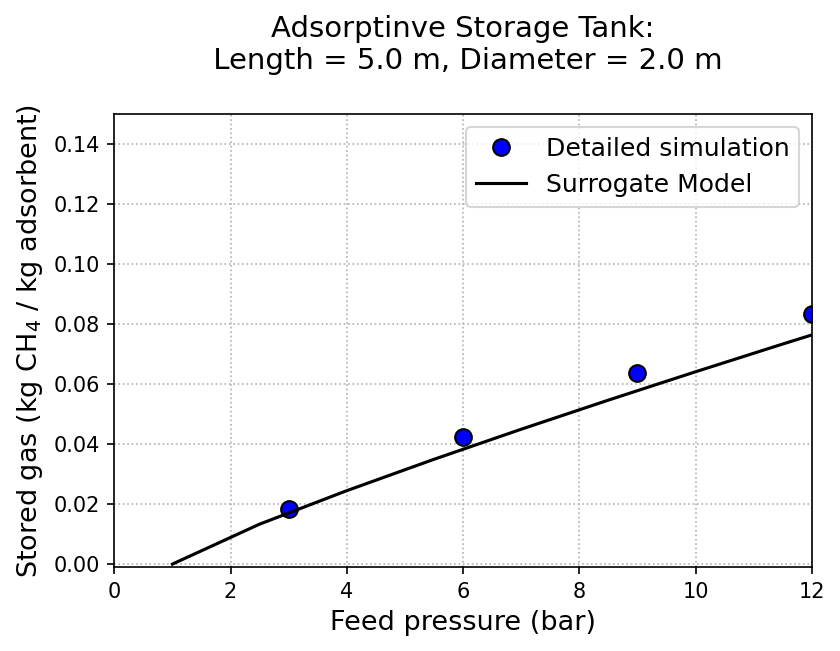

In [25]:
Mw_av = np.sum(
    np.array(feed_composition)*np.array([0.016, 0.014])) # kg/mol [CH4, N2]
del_M_kg = Mw_av*np.array(del_M_list)

plt.figure(dpi = 150)
plt.plot(Pfeed_arr, del_M_kg / (rho_solid*L*A*(1-epsi)),
         'o', color = 'k',markersize = 8, mfc = 'b',
        label = 'Detailed simulation')
plt.plot(P_ran,del_M_pred,'k',label = 'Surrogate Model')


plt.xlabel('Feed pressure (bar)', fontsize = 13)
#plt.ylabel('Stored gas (kg)', fontsize = 13)
plt.ylabel('Stored gas (kg CH$_{4}$ / kg adsorbent)', fontsize = 13)

plt.legend(fontsize = 12)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m\n'.format(Leng,Diam), fontsize = 14)
plt.xlim(0, 12)
plt.ylim(-0.001, 0.15)
plt.grid(linestyle = ':')

## Temperture Shift

In [26]:
print(Pfeed_arr[Pfeed_arr<1])

[]


In [33]:
def fn_guess(par,P):
    #T_return = par[0]*(par[1]*P)/(1+ par[1]*P) + par[2]*(par[3]*P)/(1+ par[3]*P)
    T_return = par[0]*(par[1]*(P-P_init)**par[2])/(1+ par[1]*(P-P_init)**par[2])
    return T_return
    
def err_tempshif(par):
    #del_m_tmp = par[0]*(2*par[1]*Pfeed_arr+par[2]*Pfeed_arr**2)/(1+ par[1]*Pfeed_arr+par[2]*Pfeed_arr**2)
    #del_m_tmp = par[0]*(2*par[1]*Pfeed_arr+par[2]*Pfeed_arr**2)/(1+ par[1]*Pfeed_arr+par[2]*Pfeed_arr**2)
    #del_m_tmp = par[0]*(par[1]*Pfeed_arr)/(1+ par[1]*Pfeed_arr) + par[2]*(par[3]*Pfeed_arr)/(1+ par[3]*Pfeed_arr)
    T_tmp = fn_guess(par,Pfeed_arr)
    err = T_tmp - np.array(T_fin_list)
    err_sq_sum = np.sum(err**2)
    return err_sq_sum
#res_opt = optim.shgo(err_storage, bounds=[[20,200],[0,10],[0,20],[0,100]])
res_opt = optim.minimize(err_tempshif, x0 = [112.6, 0.05, 0.9],
                        method = 'Nelder-Mead')
print(res_opt)
res_opt_T = res_opt
psol = res_opt.x
P_ran = np.linspace(Pfeed_arr[0],Pfeed_arr[-1],111)
T_fin_pred = fn_guess(psol, P_ran)

 final_simplex: (array([[1.12613857e+02, 4.25559339e-02, 9.29543035e-01],
       [1.12613837e+02, 4.25557242e-02, 9.29544365e-01],
       [1.12613944e+02, 4.25560282e-02, 9.29541756e-01],
       [1.12613881e+02, 4.25559525e-02, 9.29542585e-01]]), array([8.28604694, 8.28604695, 8.28604696, 8.28604696]))
           fun: 8.286046944652465
       message: 'Optimization terminated successfully.'
          nfev: 175
           nit: 95
        status: 0
       success: True
             x: array([1.12613857e+02, 4.25559339e-02, 9.29543035e-01])


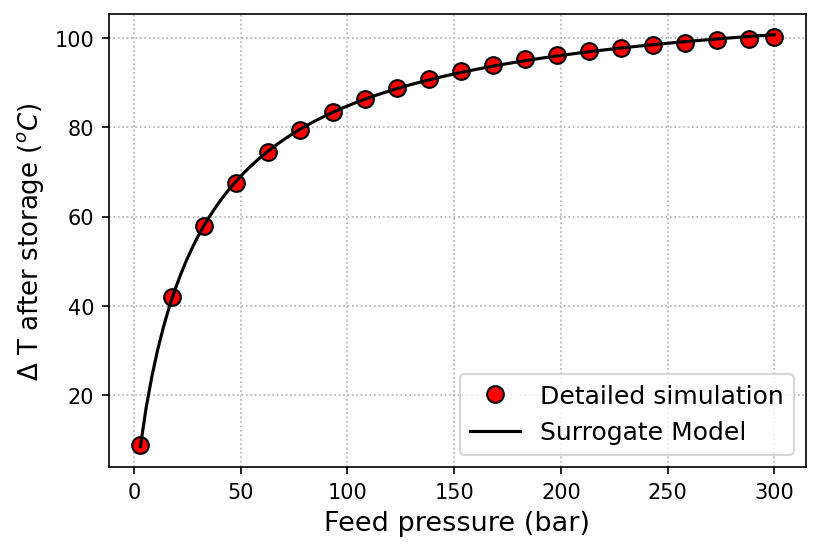

In [35]:
plt.figure(dpi = 150)

Pfeed_arr_new = np.concatenate([Pfeed_arr[::5],[Pfeed_arr[-1]]])
T_fin_list_new = np.concatenate([T_fin_list[::5], [T_fin_list[-1]]])

plt.plot(Pfeed_arr_new, T_fin_list_new, 
        'o', color = 'k',markersize = 8,mfc = 'r',
        label = 'Detailed simulation')

plt.xlabel('Feed pressure (bar)', fontsize = 13)
plt.ylabel('$\Delta$ T after storage ($^{o}C$)', fontsize = 12.5)

plt.plot(P_ran,T_fin_pred,'k',label = 'Surrogate Model')

plt.legend(fontsize = 12)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
#plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m\n'.format(Leng,Diam), fontsize = 14)

plt.grid(linestyle = ':')

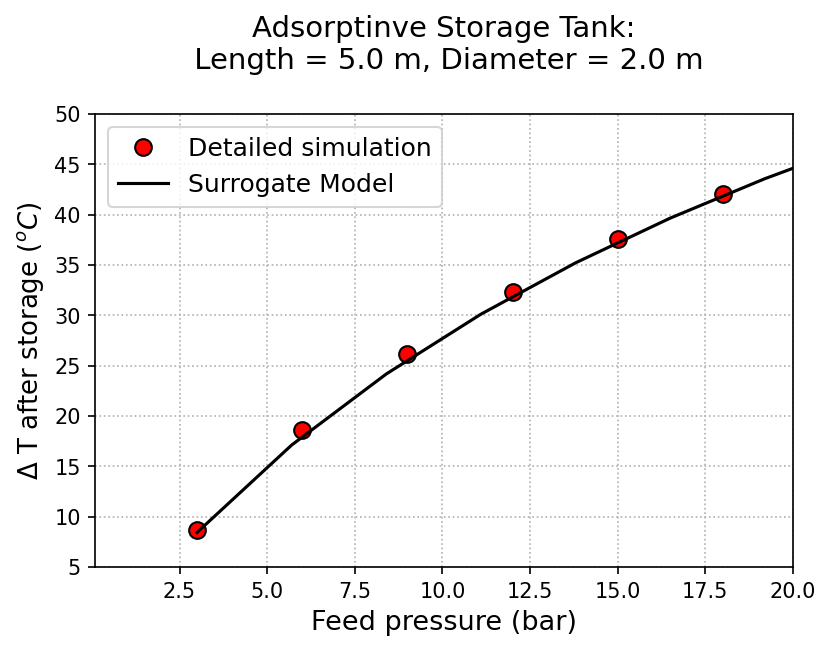

In [59]:

plt.figure(dpi = 150)
plt.plot(Pfeed_arr, T_fin_list, 
        'o', color = 'k',markersize = 8,mfc = 'r',
        label = 'Detailed simulation')

plt.xlabel('Feed pressure (bar)', fontsize = 13)
plt.ylabel('$\Delta$ T after storage ($^{o}C$)', fontsize = 12.5)

plt.plot(P_ran,T_fin_pred,'k',label = 'Surrogate Model')

plt.legend(fontsize = 12)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m\n'.format(Leng,Diam), fontsize = 14)

plt.xlim(0.1,20)
plt.ylim(5, 50)

plt.grid(linestyle = ':')

In [60]:
print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
print('[[Final Result: Surrogate Model]]')
print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
print()
print('Mass capacity:')
print('M (kg CH4 / kg adsorbent) = ')
print('k1*k2*( P - P_init )^k3 / ( 1 + k2*( P - P_init )^k3 )')
print()
print('[k1 , k2, k3] = ')
print(res_opt_M.x)
print()
print()

print('Temperature difference:')
print('dT (K) = ')
print('j1*(j2*(P-P_init)**j3)/(1+ j2*(P-P_init)**j3)')
print()
print('[j1 , j2, j3] = ')
print(res_opt_T.x)
#a = input('enter any key to complete this.')


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
[[Final Result: Surrogate Model]]
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Mass capacity:
M (kg CH4 / kg adsorbent) = 
k1*k2*( P - P_init )^k3 / ( 1 + k2*( P - P_init )^k3 )

[k1 , k2, k3] = 
[1.54028371e+01 6.38285489e-04 8.64567755e-01]


Temperature difference:
dT (K) = 
j1*(j2*(P-P_init)**j3)/(1+ j2*(P-P_init)**j3)

[j1 , j2, j3] = 
[1.12613877e+02 4.25557936e-02 9.29543662e-01]


In [61]:
print('Specific \nCapacity (kg/kg) \nat 300 bar =')
print()
print( del_M_kg[-1]/ ((1-epsi)*A*L*rho_solid)  )
print('(kg/kg)')

Specific 
Capacity (kg/kg) 
at 300 bar =

1.2524114095936458
(kg/kg)
